# Hypothesis Testing

## Objective: 
1. To find out the variables that are significant in predicting the demand for shared electric cycles. 
2. How well are these features/variables describe the demand of electric cycles in Indian market?
3. To find which variables describe the demand well and why. 

In [1]:
import math
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import t, f, norm, ttest_ind, ttest_rel, f_oneway, chi2, chisquare, chi2_contingency, kruskal, kstest  

In [2]:
df = pd.read_csv("bike_sharing.csv")

In [3]:
df.shape

(10886, 12)

In [4]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### Column Profiling: 

1. datetime: datetime     
2. season: season (1: spring, 2: summer, 3: fall, 4: winter)    
3. holiday: whether day is a holiday or not   
4. working day: if day is neither weekend nor holiday is 1, otherwise is 0.   
5. weather:   
       1: Clear, Few clouds, partly cloudy, partly cloudy  
       2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist   
       3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds   
       4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog   
6. temp: temperature in Celsius   
7. atemp: feeling temperature in Celsius   
8. humidity: humidity   
9. windspeed: wind speed  
10. casual: count of casual users   
11. registered: count of registered users   
12. count: count of total rental bikes including both casual and registered   


In [5]:
print("No. of unique elements in each column:")
print("--------------------------------------")
for i in df.columns:
    print(i, df[i].nunique())

No. of unique elements in each column:
--------------------------------------
datetime 10886
season 4
holiday 2
workingday 2
weather 4
temp 49
atemp 60
humidity 89
windspeed 28
casual 309
registered 731
count 822


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


No categorical variables found in provided dataset. 

In [7]:
df['datetime'] =  pd.to_datetime(df['datetime']) # Converting datetime from object to datetime object to apply pandas functions during further analysis
df['day_name'] = df['datetime'].dt.day_name() # Extracting day name for visual analysis
df['month_name'] = df['datetime'].dt.month_name() # Extracting month name for visual analysis

In [8]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [9]:
df.isnull().sum() #No missing values 

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
day_name      0
month_name    0
dtype: int64

In [10]:
df['season'].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

This dataset consists of equal amount of data across all the seasons. 

In [11]:
df['holiday'].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

In [12]:
df['workingday'].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [13]:
df['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

### Univariate Analysis 

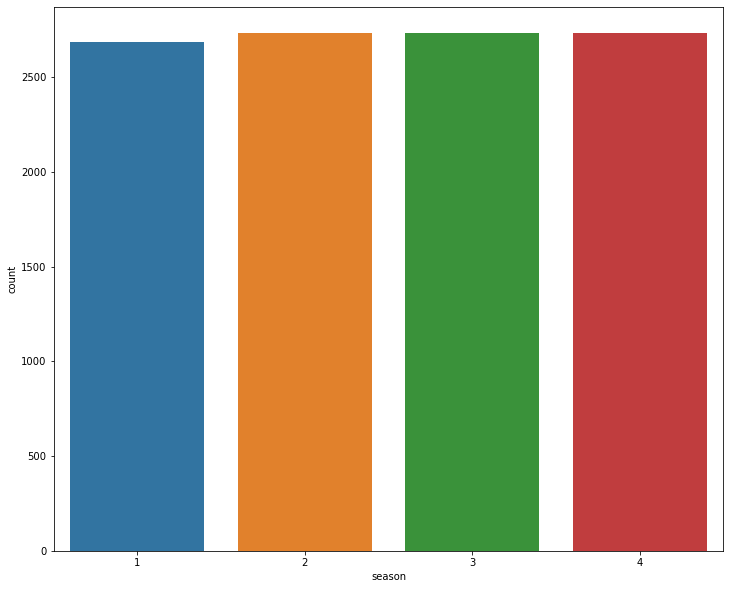

In [14]:
plt.figure(figsize=(12,10))
sns.countplot(x=df['season'])
plt.show()

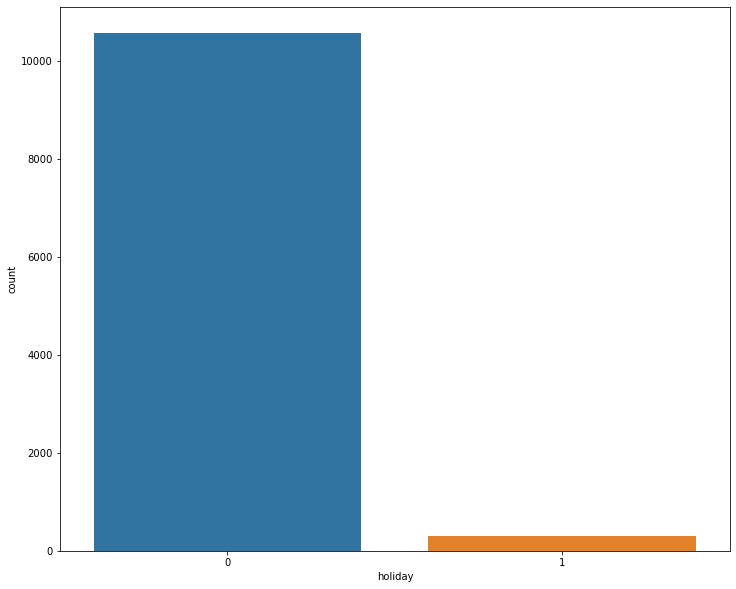

In [15]:
plt.figure(figsize=(12,10))
sns.countplot(x=df['holiday'])
plt.show()

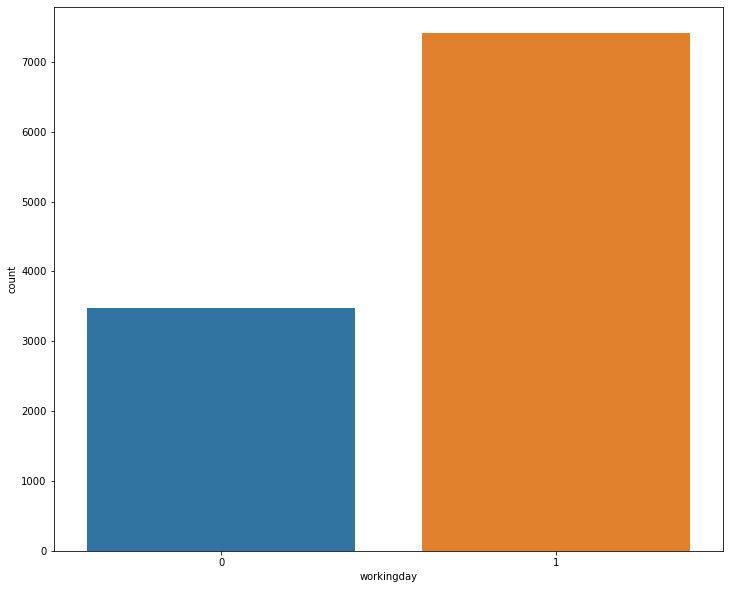

In [16]:
plt.figure(figsize=(12,10))
sns.countplot(x=df['workingday'])
plt.show()

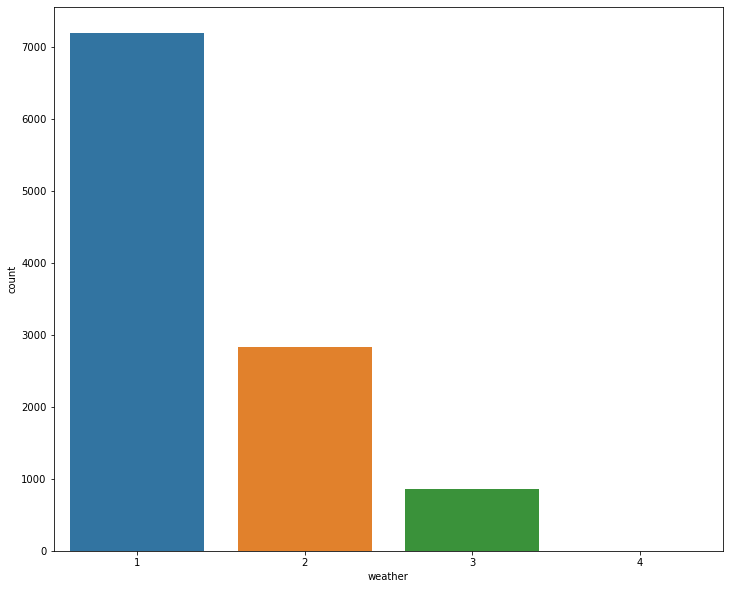

In [17]:
plt.figure(figsize=(12,10))
sns.countplot(x=df['weather'])
plt.show()

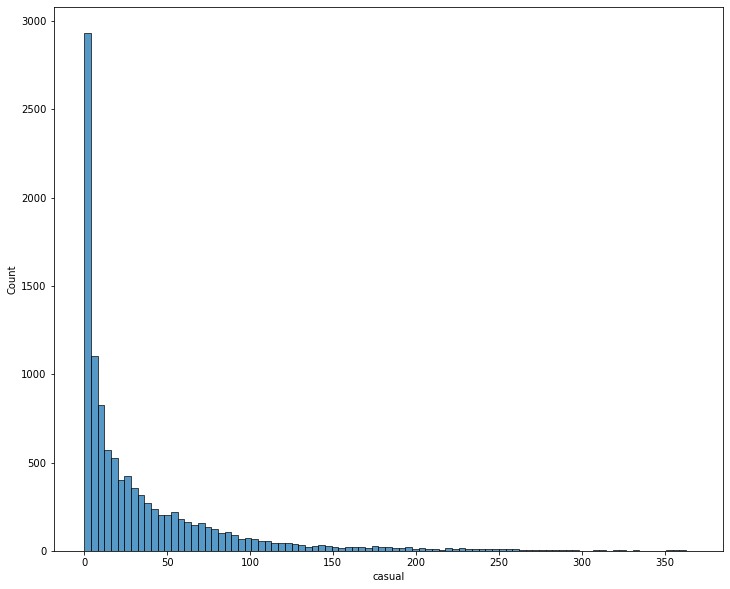

In [18]:
plt.figure(figsize=(12,10))
sns.histplot(x=df['casual'])
plt.show()

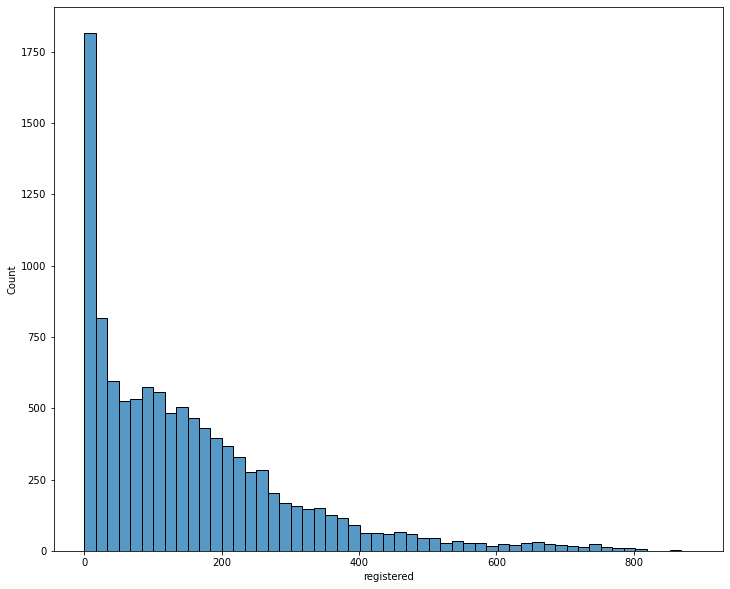

In [19]:
plt.figure(figsize=(12,10))
sns.histplot(x=df['registered'])
plt.show()

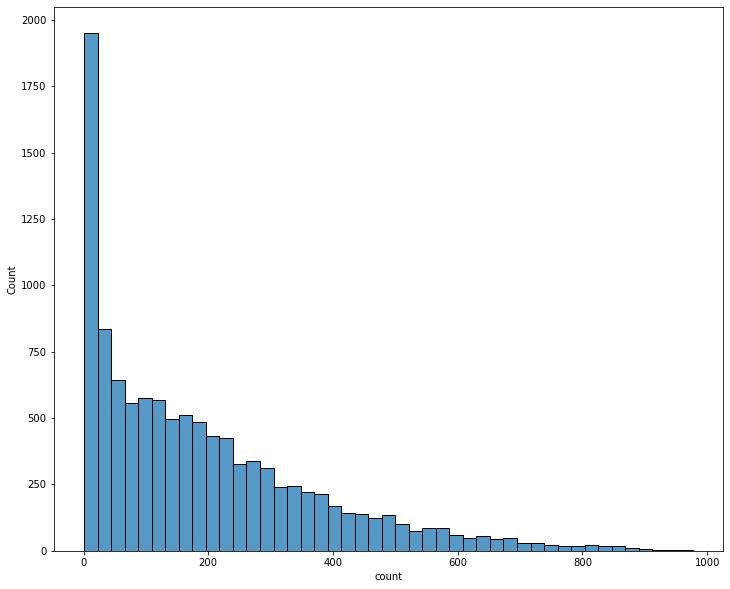

In [20]:
plt.figure(figsize=(12,10))
sns.histplot(x=df['count'])
plt.show()

#### Insights: 
1. Distribution of count of electric vehicles follows right skewed distribution. 
2. Count of electric vehicles ranges between 1-1000 (approx). 

### Bivariate Analysis

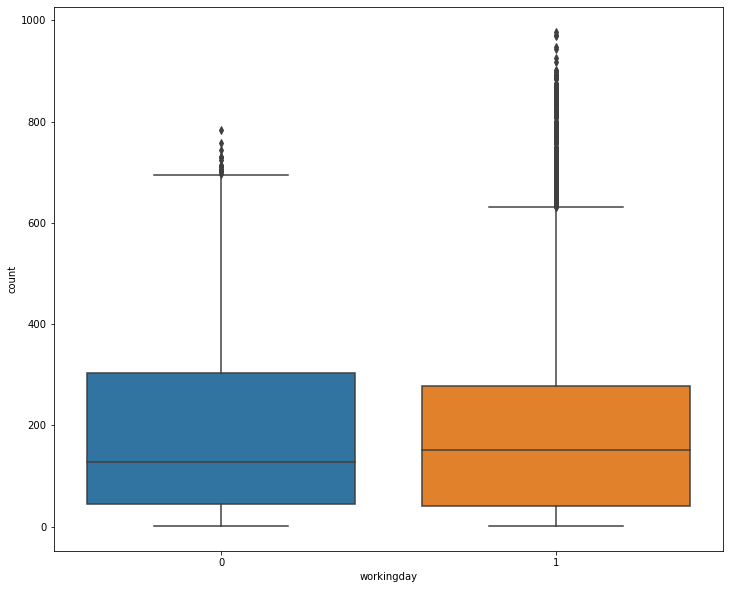

In [21]:
plt.figure(figsize=(12,10))
sns.boxplot(x=df['workingday'], y=df['count'])
plt.show()

#### Insights: 
1. Median and IQR for both working and non-working day are mostly similar. 
2. We can assume that working_day doesn't impact the count much. (Need to check this using hypothesis testing.)

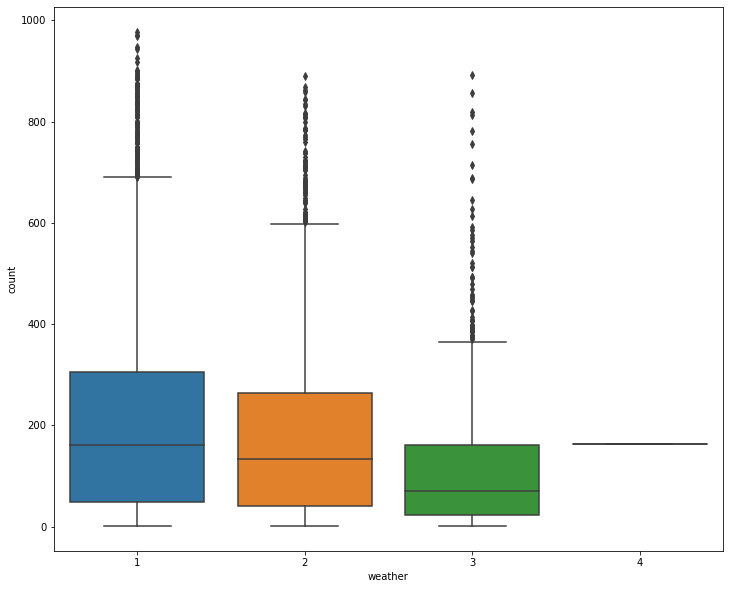

In [22]:
plt.figure(figsize=(12,10))
sns.boxplot(x=df['weather'], y=df['count'])
plt.show()

#### Insights: 
1. Median is quite high for weather 1 (Clear, Few clouds, partly cloudy, partly cloudy) which means people are feeling comfortable to travel on electric bikes in this weather. 
2. It is less likely that people rents electric bikes in weather 3 (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds) and 4 (Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog).

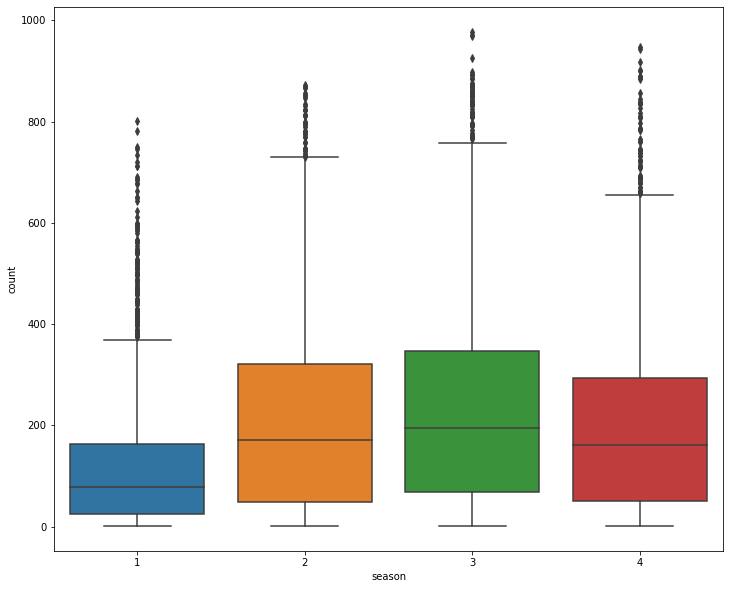

In [23]:
plt.figure(figsize=(12,10))
sns.boxplot(x=df['season'], y=df['count'])
plt.show()

#### Insights: 
1. IQR and median are quite similar for summer and fall. 
2. Surprisingly, people tend to rent almost same no of electric bikes in winter compared to summer and fall. 

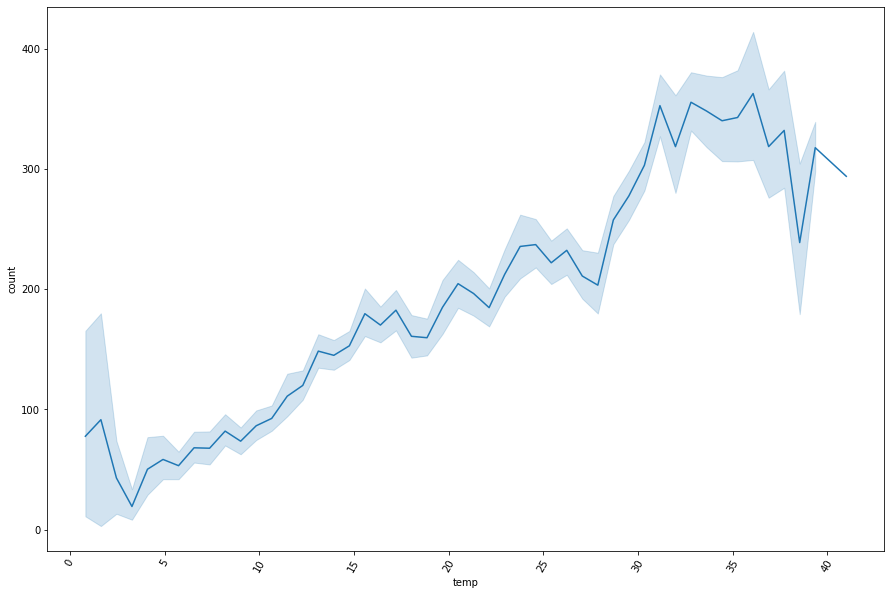

In [24]:
plt.figure(figsize=(15,10))
sns.lineplot(x=df['temp'], y=df['count'])
plt.xticks(rotation = 60)
plt.show()

#### Insights: 
1. With the help of above graph we can say that the count of electric bike rentals increases as the temp increases.  
2. Public tends to rent more electric vehicles when temparature is between 30-35 degrees (celsius). 

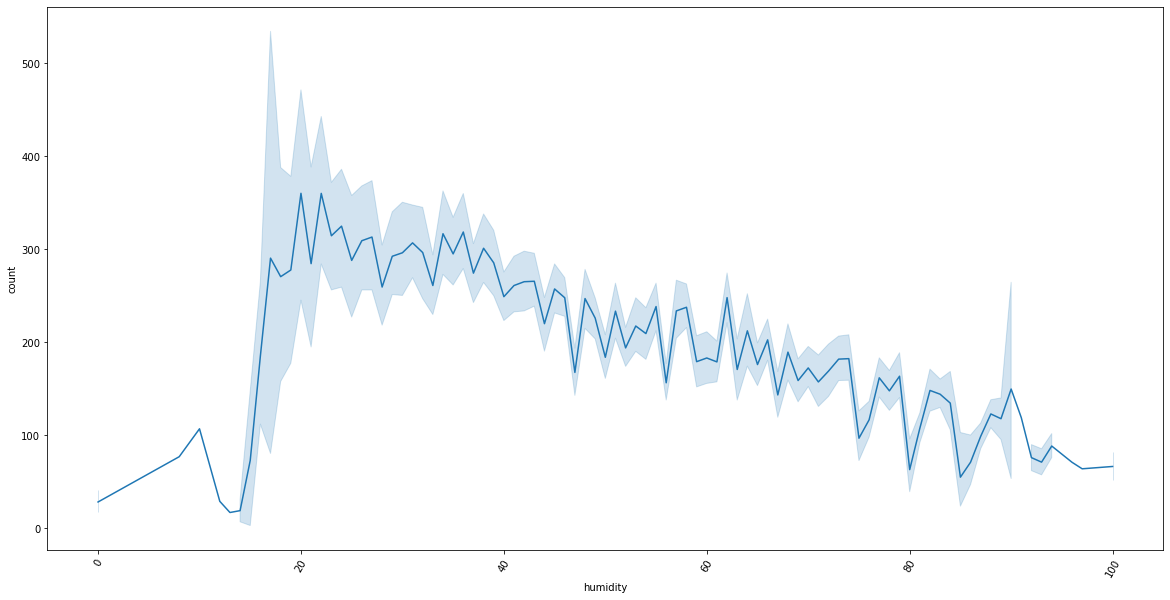

In [25]:
plt.figure(figsize=(20,10))
sns.lineplot(x=df['humidity'], y=df['count'])
plt.xticks(rotation = 60)
plt.show()

#### Insights: 
1. Above graph says that count of electric bike rentals declines gradually as humidity increases. 
2. People tend to rent more electric bikes when humidity is between 20-40. 

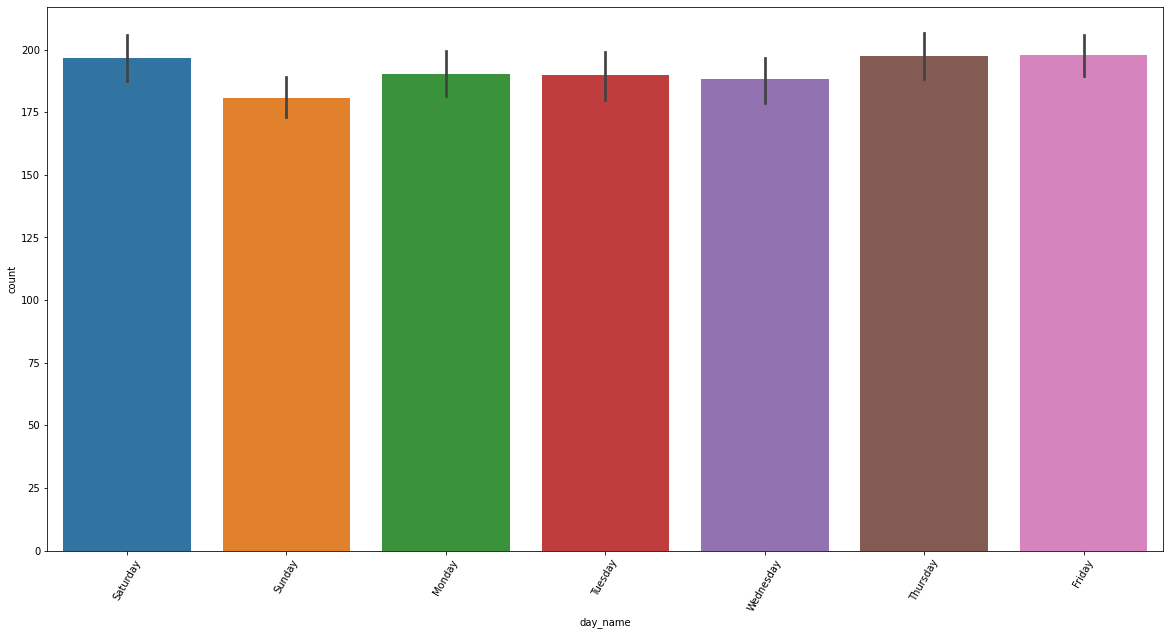

In [26]:
plt.figure(figsize=(20,10))
sns.barplot(x=df['day_name'], y=df['count'])
plt.xticks(rotation = 60)
plt.show()

1. Public are more likely rent electric vehicles on Thrusday, Friday, and Saturday.
2. As per the, it is slightly less likely that people rent electric vehicles on Sunday.   

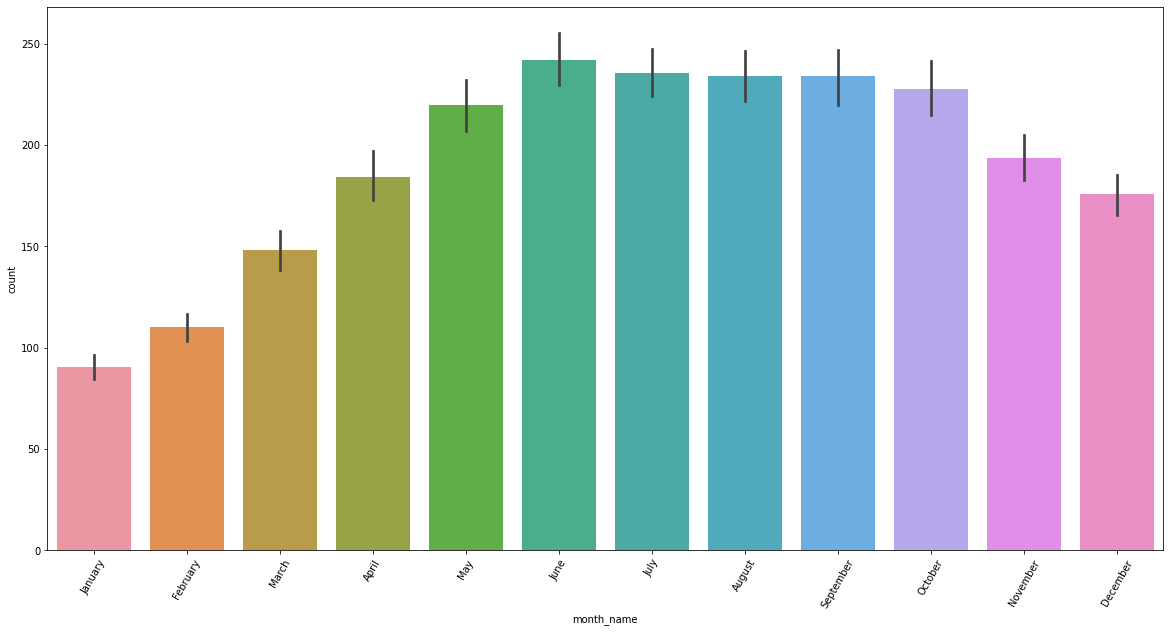

In [27]:
plt.figure(figsize=(20,10))
sns.barplot(x=df['month_name'], y=df['count'])
plt.xticks(rotation = 60)
plt.show()

1. As per given data, it is observed that people tend to rent the electric vehicles more in the month of June. 
2. People are renting less electric vehicles in Quarter 1 compared to other quarters.  

### Multivariate Analysis 

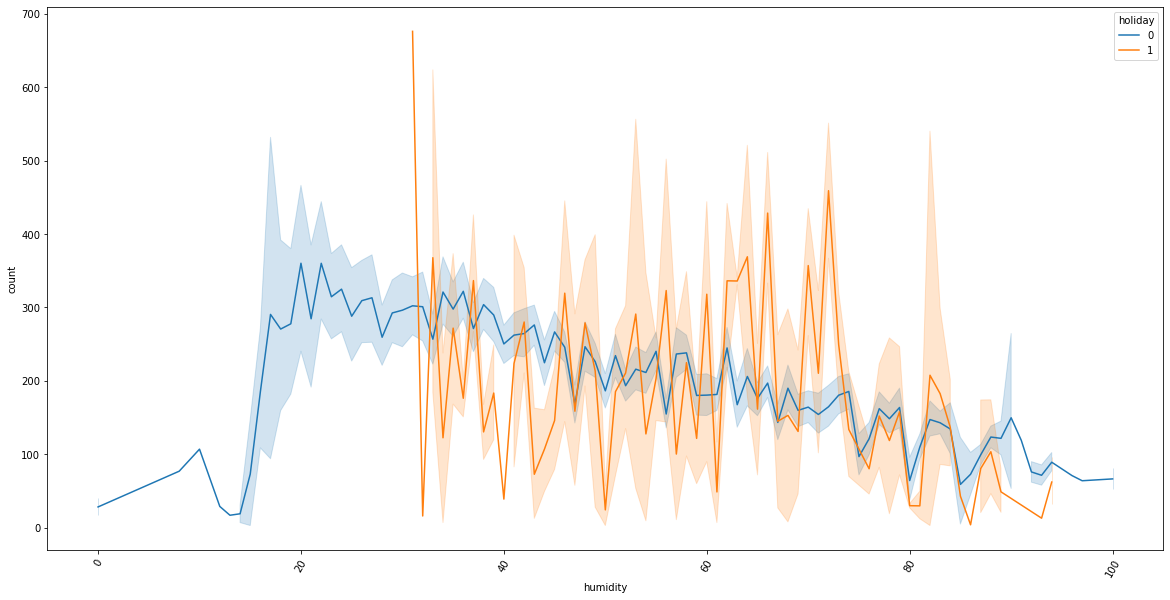

In [28]:
plt.figure(figsize=(20,10))
sns.lineplot(x=df['humidity'], y=df['count'], hue=df['holiday'])
plt.xticks(rotation = 60)
plt.show()

#### Insights: 
1. People are more likely to rent a electric vehicles on a holiday even though the humidity is between 60-80. 
2. On a working day, it is less likely that people take electric bikes if humidity is high.

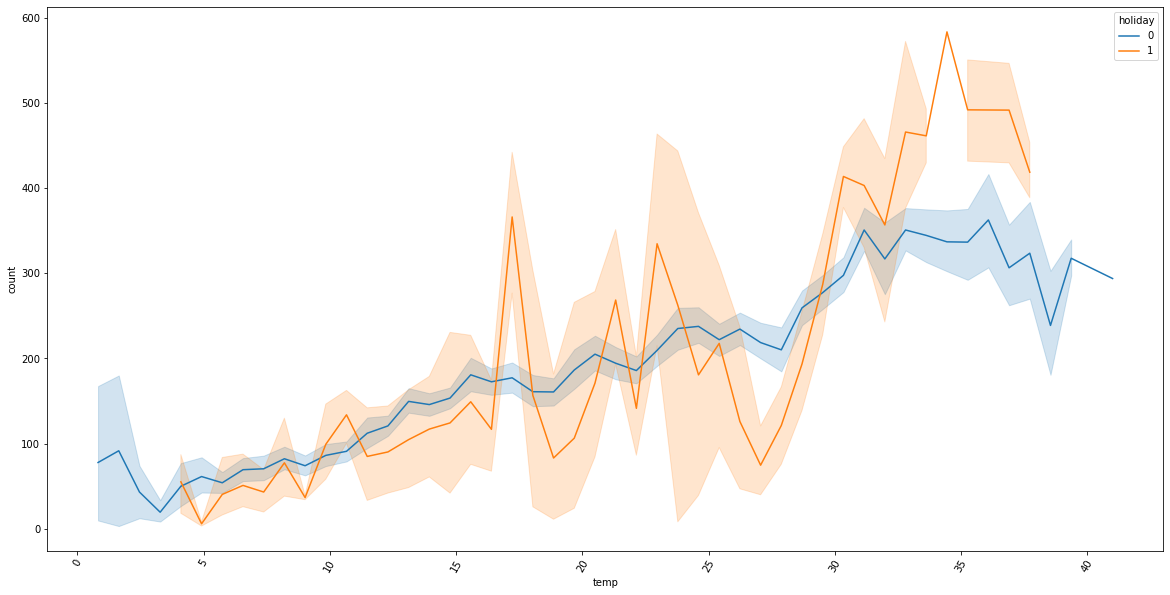

In [29]:
plt.figure(figsize=(20,10))
sns.lineplot(x=df['temp'], y=df['count'], hue=df['holiday'])
plt.xticks(rotation = 60)
plt.show()

#### Insights: 
1. People are less likely to take a electric bike rental if temparature is less than 5 degress (celsius). 

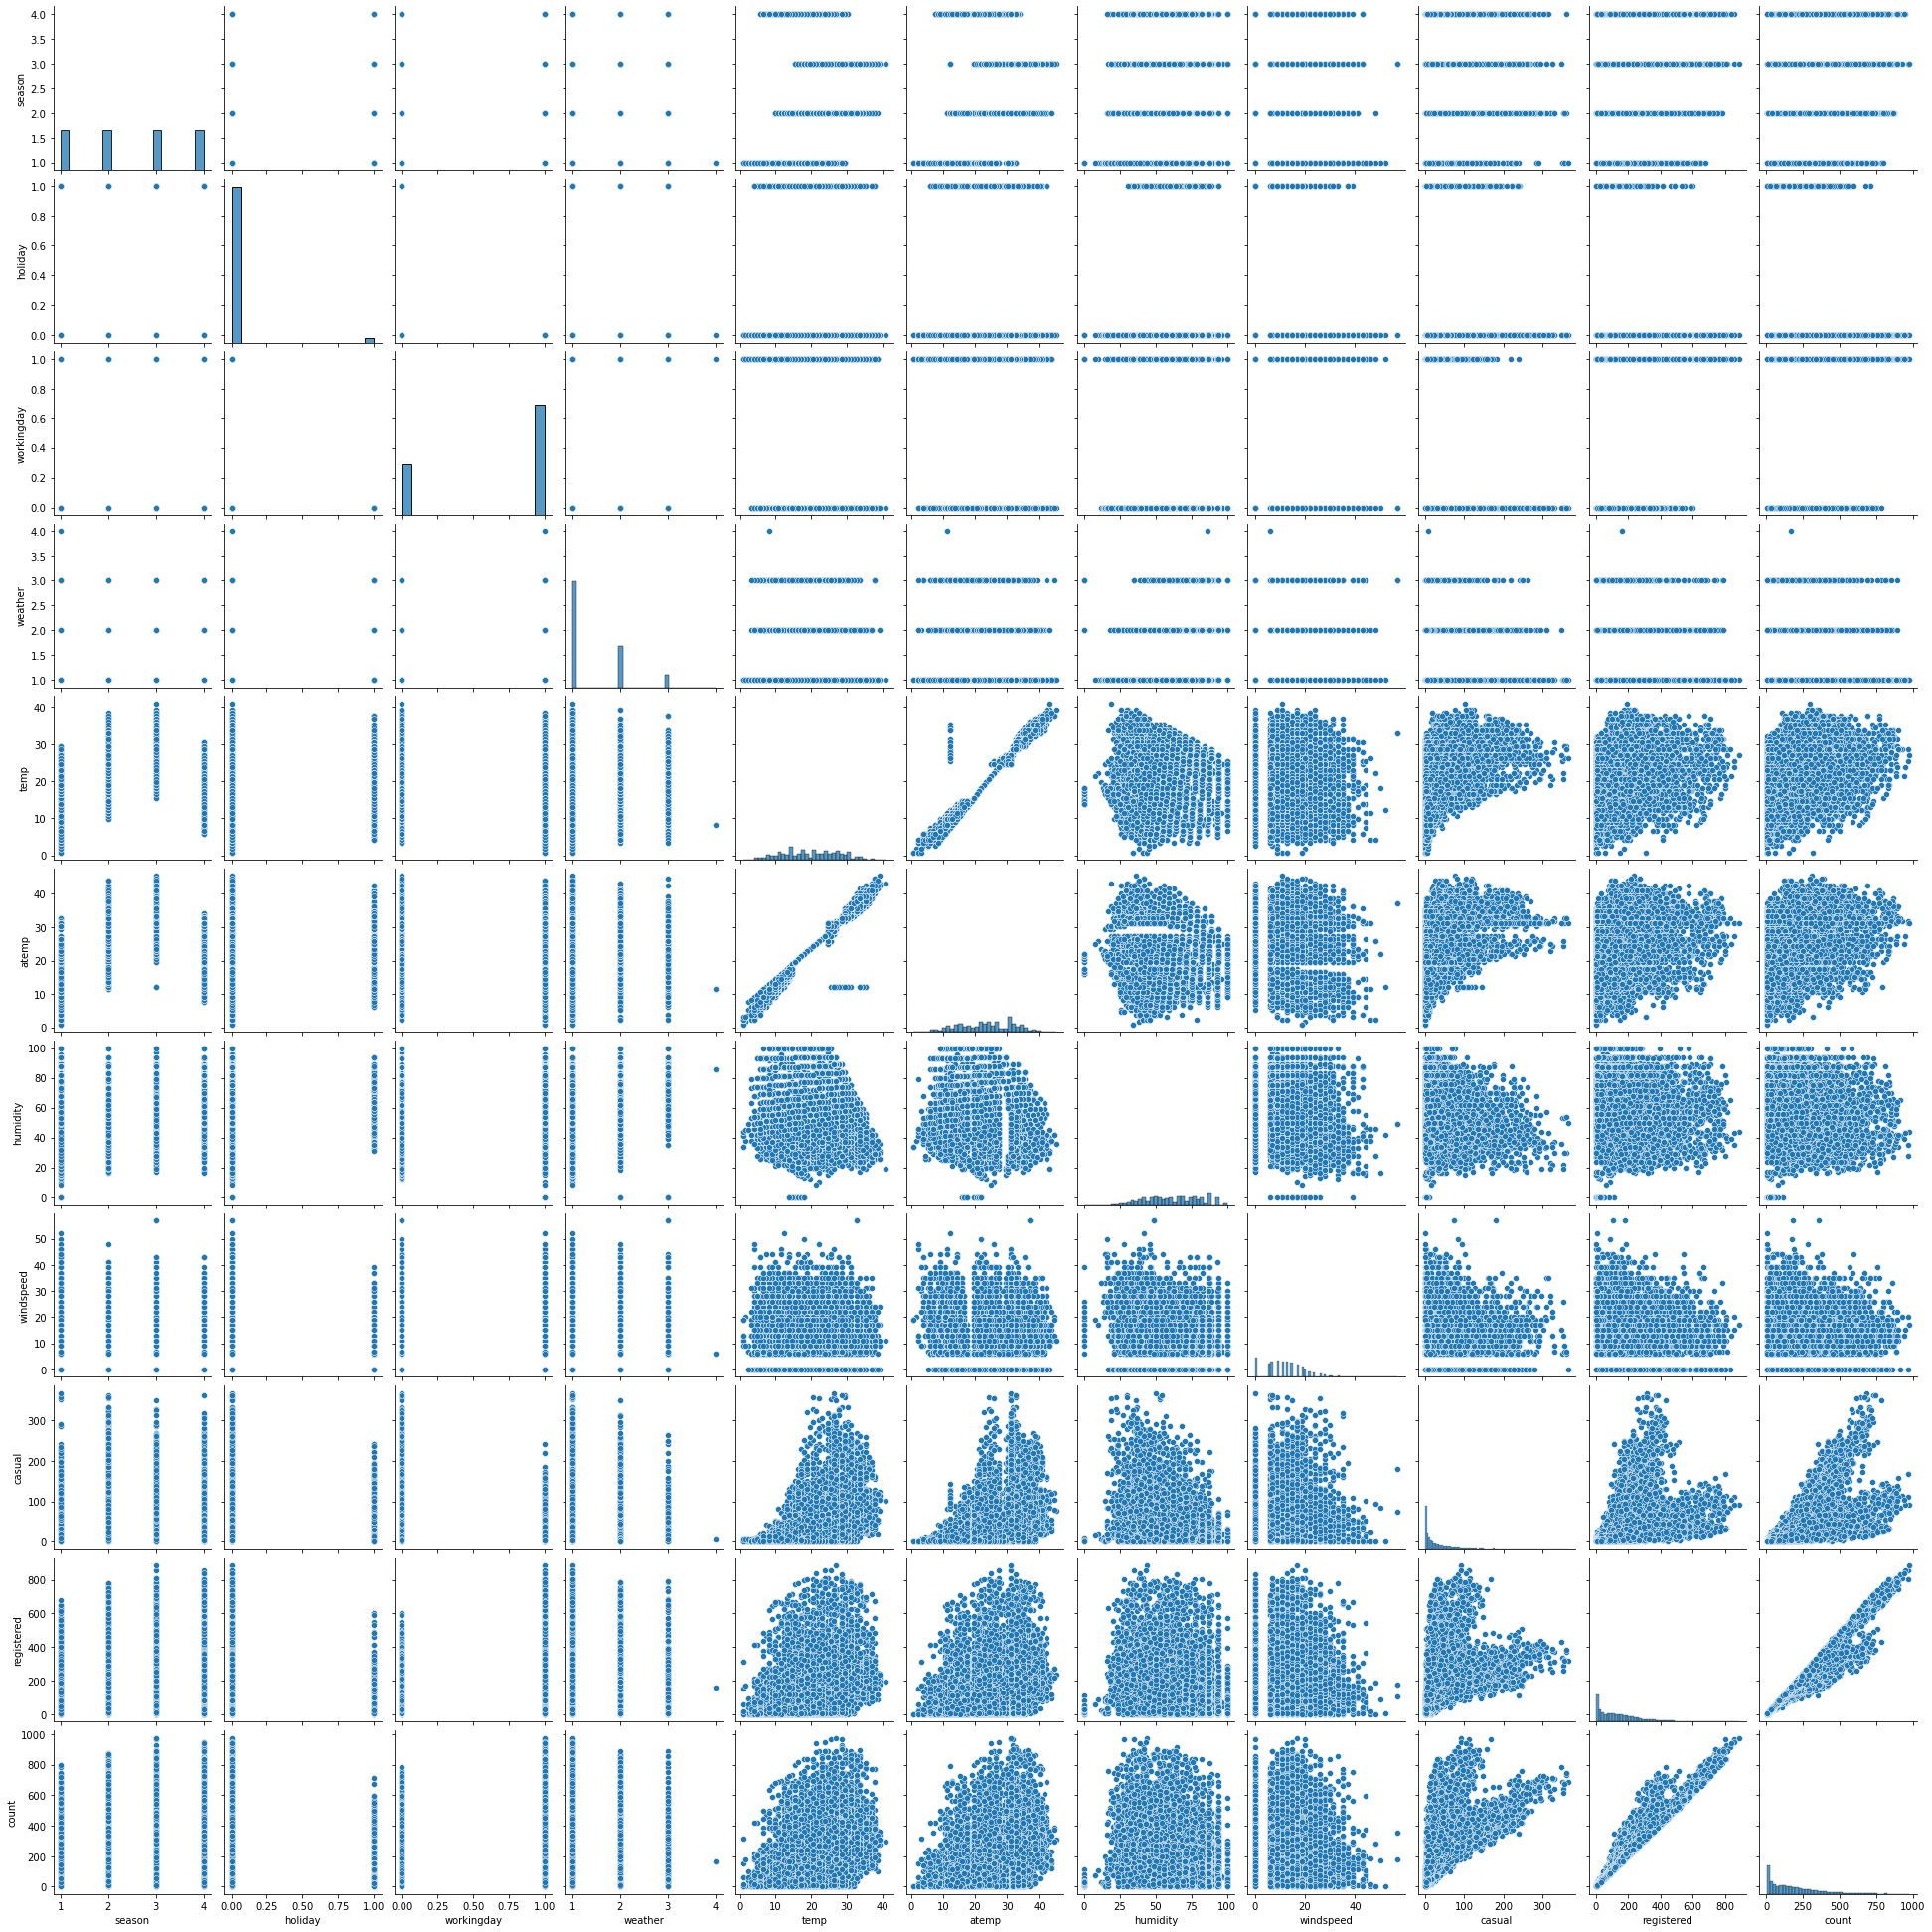

In [30]:
sns.pairplot(df)

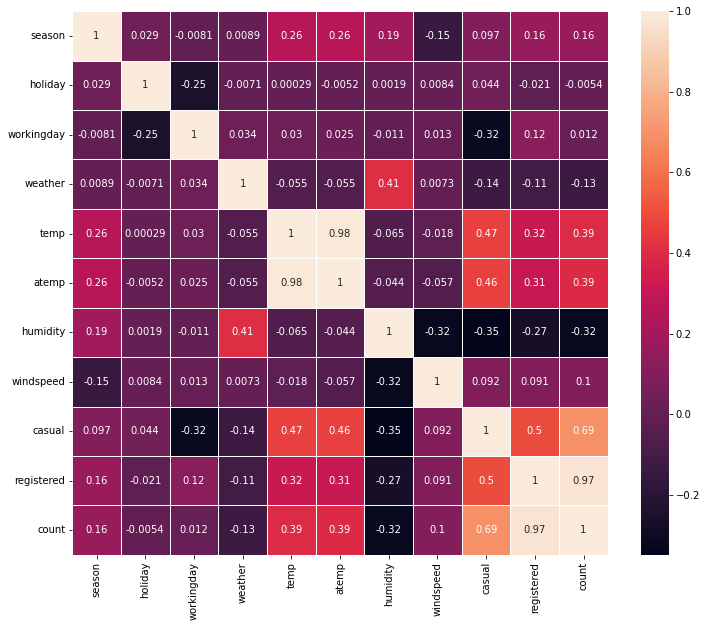

In [31]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True,linewidth=.5)
plt.show()

1. Temperature is positively correlated with the count of electric bikes rented. 
2. Humidity and count of electric bikes are negatively correlated. 

### Hypothesis Testing 

#### 1. To check if Working Day has an effect on the number of electric cycles rented 

Ho - There is no difference in electric cycle rented between working day and non working day  
Ha - Electric cycles were rented more on a working day 

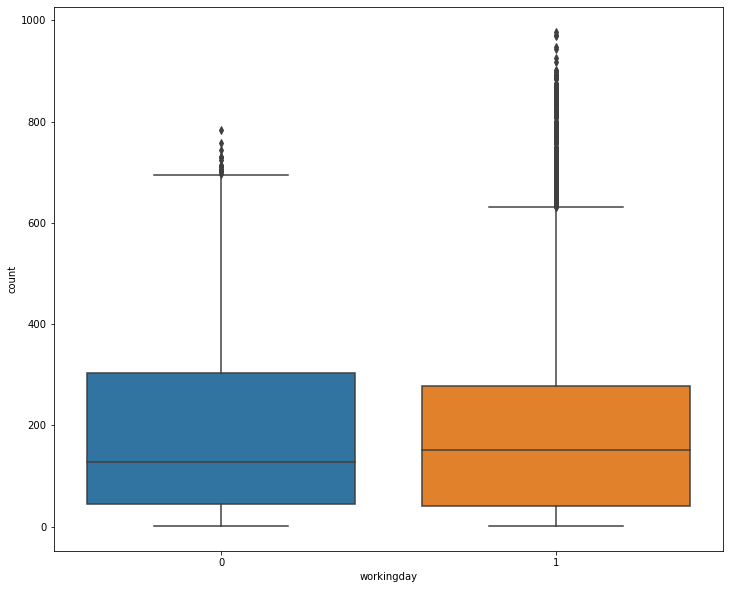

In [32]:
plt.figure(figsize=(12,10))
sns.boxplot(x=df['workingday'], y=df['count'])
plt.show()

In [33]:
df_wd = df.loc[df['workingday']==1]['count']
df_nwd = df.loc[df['workingday']==0]['count']

In [34]:
alpha = 0.05 # Consider 5% as significance level which is standard across the industry 
test_stat, p_value = ttest_ind(df_wd, df_nwd, alternative='greater')

print("Test Statistic =", test_stat, "\np-value =" , p_value)
print("-------------------------------------")

if p_value<alpha: 
    print('Reject Ho')
else:
    print('Fail to reject Ho')

Test Statistic = 1.2096277376026694 
p-value = 0.11322402113180674
-------------------------------------
Fail to reject Ho


In the above snippet, I have used ttest_ind since we have only two samples here and we are checking if electric cycles rented on working day are significantly more than that of electric cycles rented on a non-working day. 

Ho - There is no difference in electric cycle rented between working day and non working day  
Ha - Electric cycles were rented more on a working day 

1. Test statistic - 1.2096277376026694 
2. p-value - 0.11322402113180674
3. Hypothesis test result - **Fail to reject Ho**

##### Conclusion - By above values, we can confirm that, there is no difference electric cycles rented between working day and non working day.

#### 2. To check if no. of cycles rented is similar or different in different weather

Ho - There is no difference in electric cycle rented among different types of weather  
Ha - There is significant difference in electric cycle rented among different types of weather

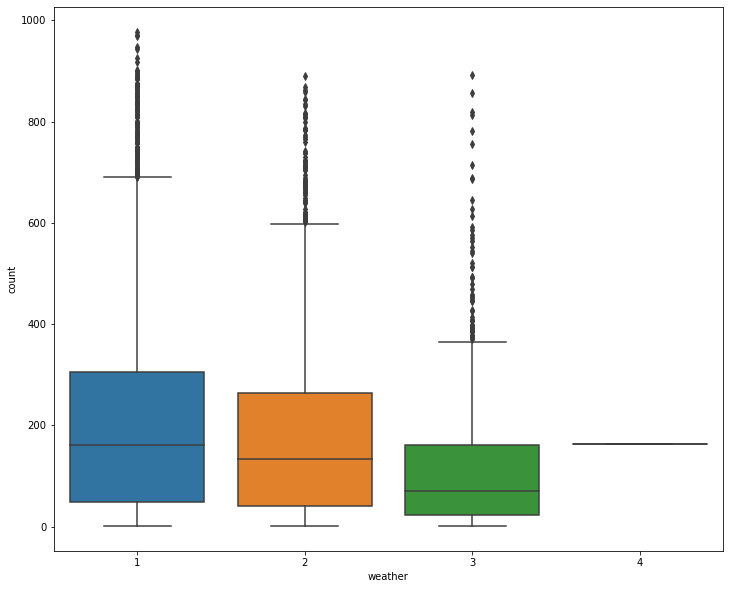

In [35]:
plt.figure(figsize=(12,10))
sns.boxplot(x=df['weather'], y=df['count'])
plt.show()

Weather:
1. Clear, Few clouds, partly cloudy, partly cloudy  
2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist   
3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds   
4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 

In [36]:
df_w1 = df.loc[df['weather']==1]['count']
df_w2 = df.loc[df['weather']==2]['count']
df_w3 = df.loc[df['weather']==3]['count']
df_w4 = df.loc[df['weather']==4]['count']

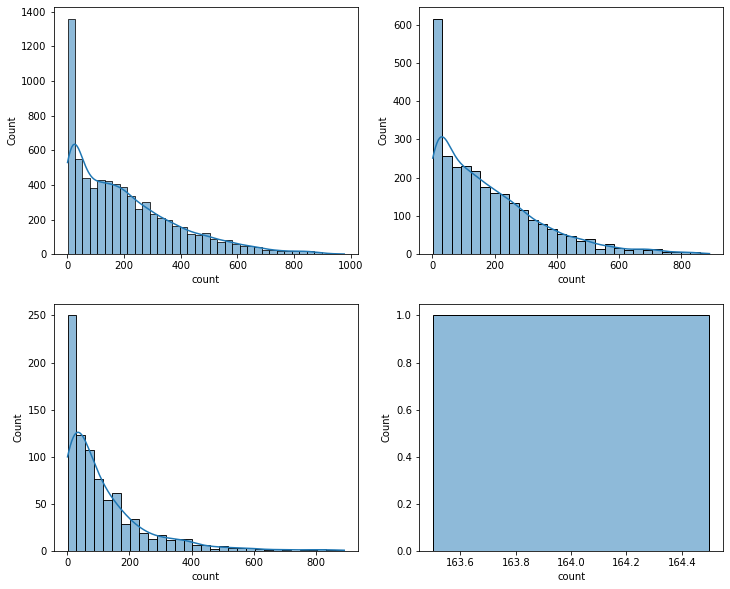

In [37]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.histplot(df_w1, kde=True)

plt.subplot(2,2,2)
sns.histplot(df_w2, kde=True)

plt.subplot(2,2,3)
sns.histplot(df_w3, kde=True)

plt.subplot(2,2,4)
sns.histplot(df_w4, kde=True)
plt.show()

ANOVA test can be applied if each of these samples are follow normal distribution which is false in this case. Before performing ANOVA we need to transform the samples in such a way that they are normally distributed using transformation techniques. In this case, I am using log transformation.  

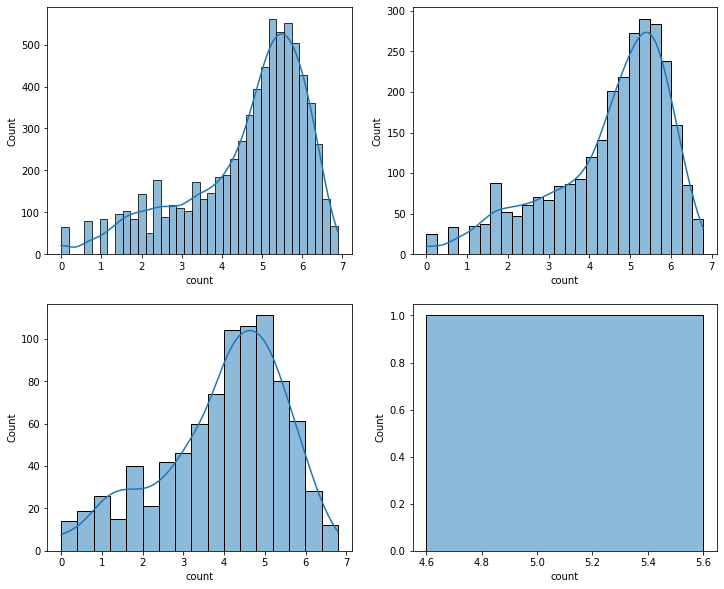

In [38]:
#LOG TRANSFORMATION
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.histplot(np.log(df_w1), kde=True)

plt.subplot(2,2,2)
sns.histplot(np.log(df_w2), kde=True)

plt.subplot(2,2,3)
sns.histplot(np.log(df_w3), kde=True)

plt.subplot(2,2,4)
sns.histplot(np.log(df_w4), kde=True)
plt.show()

After performing log tranformation - these samples doesn't seem like normally distributed. With above graphs we can say that they are left skewed. To prove this we can perform KS test which is generally used to compare two distributions. 

In [39]:
#Ho - This distribution is Gaussian
#Ha - This distribution is not Gaussian

log_w3 = np.log(df_w3)
z_w3 = (log_w3 - log_w3.mean())/log_w3.std()
kstest(z_w3, norm.cdf)

#Calculated for only df_w3 sample as other samples are even more left skewed than df_w3.  

KstestResult(statistic=0.0936095147885464, pvalue=5.30549286867732e-07)

p-value is less than 0.05 which concludes that above sample is not Gaussian. 

In [40]:
# ANOVA test
test_stat, p_value = f_oneway(np.log(df_w1), np.log(df_w2), np.log(df_w3), np.log(df_w4))
print("Test Statistic =", test_stat, "\np-value =" , p_value)
print("-------------------------------------")

if p_value<alpha: 
    print('Reject Ho')
else:
    print('Fail to reject Ho')

Test Statistic = 49.879471483981746 
p-value = 5.214500121600914e-32
-------------------------------------
Reject Ho


In [41]:
#Kruskal's test
test_stat, p_value = kruskal(df_w1, df_w2, df_w3, df_w4)
print("Test Statistic =", test_stat, "\np-value =" , p_value)
print("-------------------------------------")

if p_value<alpha: 
    print('Reject Ho')
else:
    print('Fail to reject Ho')

Test Statistic = 205.00216514479087 
p-value = 3.501611300708679e-44
-------------------------------------
Reject Ho


In the above snippets, I have used ANOVA test even though the samples are not normally distributed to check the p-value and it turns out to be very less which means we can reject Ho.

Since, these samples are not normally distributed we can use Kruskal's test to check the relation between seasons and count. 

Ho - There is no difference in electric cycle rented among different types of weather  
Ha - There is difference in electric cycle rented among different types of weather  

**ANOVA Test -**
1. Test statistic - 49.879471483981746 
2. p-value - 5.214500121600914e-32
3. Hypothesis test result - **Reject Ho**

**Kruskal's Test -**
1. Test statistic - 205.00216514479087 
2. p-value - 3.501611300708679e-44
3. Hypothesis test result - **Reject Ho**

##### Conclusion - By above values we can confirm that, there is difference electric cycles rented among different types of weather

#### 3. To check if no. of cycles rented is similar or different in different seasons

Ho - There is no difference in electric cycle rented among different seasons  
Ha - There is significant difference in electric cycle rented among different seasons

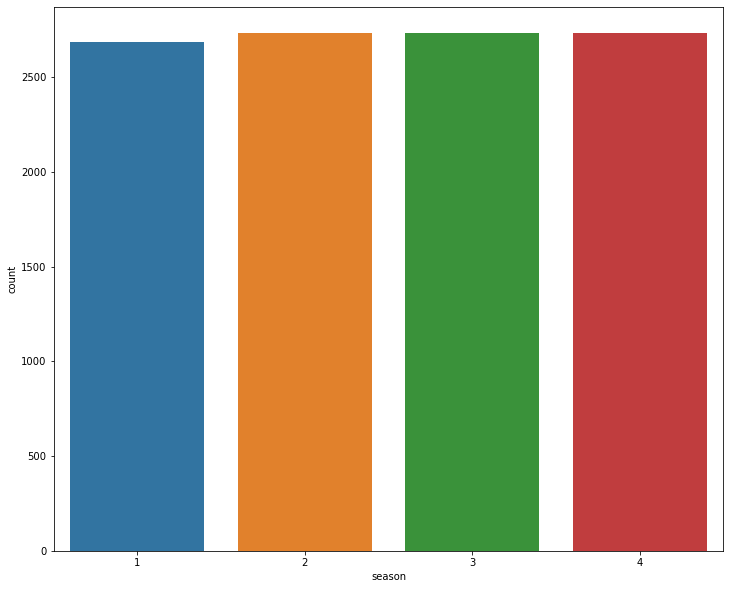

In [42]:
plt.figure(figsize=(12,10))
sns.countplot(x=df['season'])
plt.show()

Season:
1. Spring 
2. Summer
3. Fall
4. Winter

In [43]:
df_s1 = df.loc[df['season']==1]['count']
df_s2 = df.loc[df['season']==2]['count']
df_s3 = df.loc[df['season']==3]['count']
df_s4 = df.loc[df['season']==4]['count']

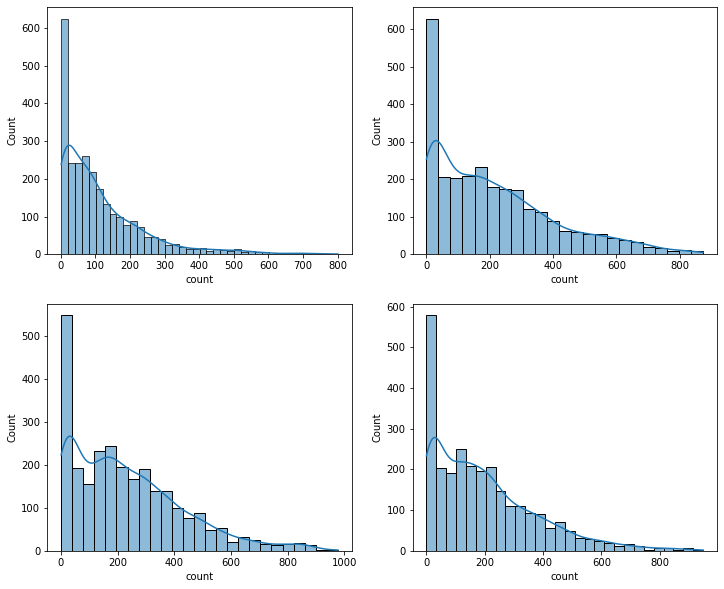

In [44]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.histplot(df_s1, kde=True)

plt.subplot(2,2,2)
sns.histplot(df_s2, kde=True)

plt.subplot(2,2,3)
sns.histplot(df_s3, kde=True)

plt.subplot(2,2,4)
sns.histplot(df_s4, kde=True)
plt.show()

ANOVA test can be applied if each of these samples are follow normal distribution which is false in this case. Before performing ANOVA we need to transform the samples in such a way that they are normally distributed using transformation techniques. In this case, I am using log transformation.  

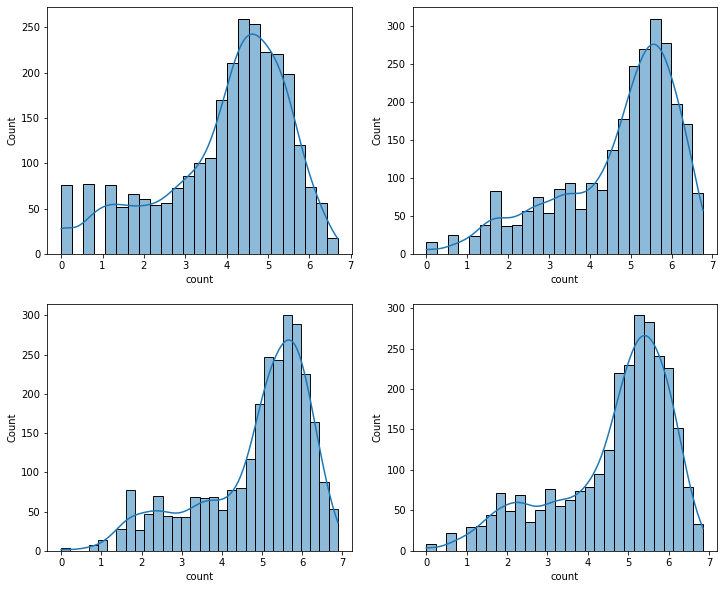

In [45]:
#LOG TRANSFORMATION
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.histplot(np.log(df_s1), kde=True)

plt.subplot(2,2,2)
sns.histplot(np.log(df_s2), kde=True)

plt.subplot(2,2,3)
sns.histplot(np.log(df_s3), kde=True)

plt.subplot(2,2,4)
sns.histplot(np.log(df_s4), kde=True)
plt.show()

After performing log tranformation - these samples doesn't seem like normally distributed. With above graphs we can say that they are left skewed. To prove this we can perform KS test which is generally used to compare two distributions. 

In [46]:
#Ho - This distribution is Gaussian
#Ha - This distribution is not Gaussian

log_s1 = np.log(df_s1)
z_s1 = (log_s1 - log_s1.mean())/log_s1.std()
kstest(z_s1, norm.cdf)

#Calculated for only df_s1 sample as other samples are even more left skewed than df_s1.  

KstestResult(statistic=0.12059298751575853, pvalue=1.6974538301055103e-34)

p-value is less than 0.05 which concludes that above sample is not Gaussian. 

In [47]:
# ANOVA test
test_stat, p_value = f_oneway(np.log(df_s1), np.log(df_s2), np.log(df_s3), np.log(df_s4))
print("Test Statistic =", test_stat, "\np-value =" , p_value)
print("-------------------------------------")

if p_value<alpha: 
    print('Reject Ho')
else:
    print('Fail to reject Ho')

Test Statistic = 192.44768979509686 
p-value = 1.3071364586238867e-121
-------------------------------------
Reject Ho


In [48]:
#Kruskal's test
test_stat, p_value = kruskal(df_s1, df_s2, df_s3, df_s4)
print("Test Statistic =", test_stat, "\np-value =" , p_value)
print("-------------------------------------")

if p_value<alpha: 
    print('Reject Ho')
else:
    print('Fail to reject Ho')

Test Statistic = 699.6668548181988 
p-value = 2.479008372608633e-151
-------------------------------------
Reject Ho


In the above snippets, I have used ANOVA test even though the samples are not normally distributed to check the p-value and it turns out to be very less which means we can reject Ho.

Since, these samples are not normally distributed we can use Kruskal's test to check the relation between seasons and count. 

Ho - There is no difference in electric cycle rented among different seasons   
Ha - There is difference in electric cycle rented among different seasons  

**ANOVA Test -**
1. Test statistic - 192.44768979509686 
2. p-value - 1.3071364586238867e-121
3. Hypothesis test result - **Reject Ho**

**Kruskal's Test -**
1. Test statistic - 699.6668548181988 
2. p-value - 2.479008372608633e-151
3. Hypothesis test result - **Reject Ho**

##### Conclusion - By above values we can confirm that, there is difference in electric cycles rented among different seasons.

#### 4. To check if weather is dependent on the season 

Ho - Weather and season are independent    
Ha - Weather and season are dependent on each other

In [49]:
pd.crosstab(df['weather'], df['season'])

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225
4,1,0,0,0


In [50]:
test_stat, p_value, dof, exp_freq  = chi2_contingency(pd.crosstab(df['weather'], df['season']))
print("Test Statistic =", test_stat, "\np-value =" , p_value, "\nDegree of freedom =" , dof,  "\nExpected Frequency =", exp_freq)
print("-------------------------------------")

if p_value<alpha: 
    print('Reject Ho')
else:
    print('Fail to reject Ho')

Test Statistic = 49.15865559689363 
p-value = 1.5499250736864862e-07 
Degree of freedom = 9 
Expected Frequency = [[1.77454639e+03 1.80559765e+03 1.80559765e+03 1.80625831e+03]
 [6.99258130e+02 7.11493845e+02 7.11493845e+02 7.11754180e+02]
 [2.11948742e+02 2.15657450e+02 2.15657450e+02 2.15736359e+02]
 [2.46738931e-01 2.51056403e-01 2.51056403e-01 2.51148264e-01]]
-------------------------------------
Reject Ho


In the above snippet, I have used Chi-square test since we have a contingency table here and we are checking test of independence of the observed frequencies in the contingency table if season and weather are dependant on each other.  

Ho - Weather and season are independent    
Ha - Weather and season are dependent on each other

1. Test statistic - 49.15865559689363 
2. p-value - 1.5499250736864862e-07 
3. Hypothesis test result - **Reject Ho**

##### Conclusion - By above values, we can confirm that weather and season are dependant on each other. 

### Conclusion: (alpha - 0.05 or significance level 5%)

To check if Working Day has an effect on the number of electric cycles rented --> Failed to reject Ho   
**Working day doesn't have any impact on no. of electric cycles rented.**

To check if no. of cycles rented is similar or different in different weather --> Reject Ho  
**There is significant difference in electric cycle rented among different types of weather.**  

To check if no. of cycles rented is similar or different in different seasons --> Reject Ho   
**There is significant difference in electric cycle rented among different seasons**

To check if Weather is dependent on the season --> Reject Ho   
**Weather and Season are dependent on each other**

## Insights:
1. As per given data, it is observed that people tend to rent the electric vehicles more in the month of June.
2. People are renting less electric vehicles in Quarter 1 compared to other quarters.
3. Count of electric bike rentals increases as the temp increases.  
4. Public tends to rent more electric vehicles when temparature is between 30-35 degrees (celsius). 
5. Count of electric bike rentals declines gradually as humidity increases. 
6. People tend to rent more electric bikes when humidity is between 20-40.  
7. Public are more likely rent electric vehicles on Thrusday, Friday, and Saturday.
8. It is observed that people tend to rent the electric vehicles more in the month of June.
9. People are renting less electric vehicles in Quarter 1 compared to other quarters.
10. People are more likely to rent a electric vehicles on a holiday even though the humidity is between 60-80. 
11. On a working day, it is less likely that people take electric bikes if humidity is high.
12. People are less likely to take a electric bike rental if temparature is less than 5 degress (celsius).